## How stock_helpers.py's Functions Work

### By: Trinity Lee

In [147]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Importing the libraries

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yahooFinance
import finplot as finplot

### How the Code works

We'll start by manually generating a list of stock tickers that we want to look at for this. We will manually create this list. We'll also choose a start date and an end date for the total window of time we want to look at for the stock closing values. 



The first thing we can do is generate a dictionary which has the stock's ticker symbol as a key and with empty values.

In [149]:

symbol_list = ["^NDX", "TSLA"]

start_date = "2010-02-25"
end_date = "2023-03-09"

stocks_empty_dict = finplot.make_stock_dict(symbol_list)



Next we can find choose when to start gathering data and when to stop gathering data and have it's stock close prices as the values of the dictionary. We have a function from stock_helpers which autofills this.




In [153]:
stocks_dict = finplot.get_close_stocks(stocks_empty_dict, start_date, end_date, normalize=True)
print("\n")
tesla_stocks = stocks_dict["TSLA"]

#We also can automatically generate a CSV file for the stocks if we want. 
finplot.export_csv(stocks_dict)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed




<AxesSubplot:>

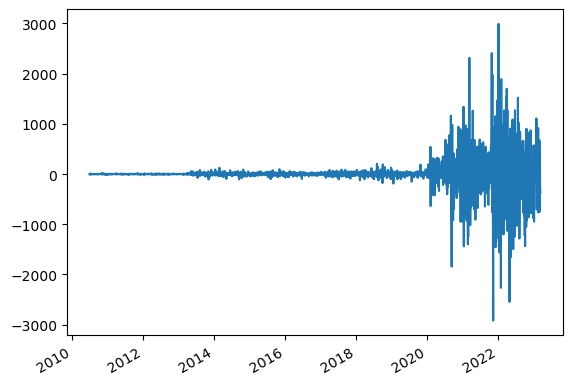

In [151]:


delt = finplot.delta_values(tesla_stocks)

delt.plot()


And Now we can plot this via plot_stocks:

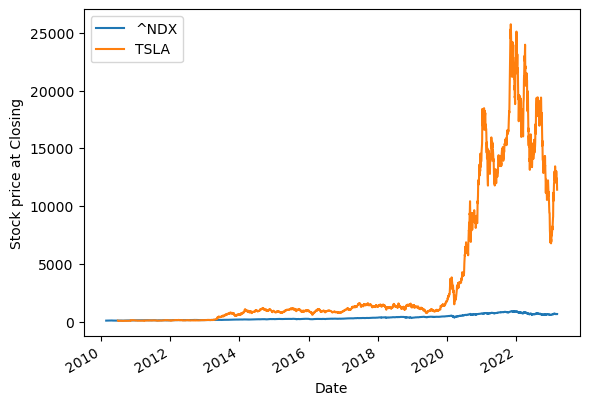

Date
2010-06-29      100.000000
2010-06-30       99.748852
2010-07-01       91.921287
2010-07-02       80.368337
2010-07-06       67.434059
                  ...     
2023-03-02    11986.183921
2023-03-03    12418.791582
2023-03-06    12168.896546
2023-03-07    11785.891756
2023-03-08    11427.373197
Name: Close, Length: 3195, dtype: float64


In [152]:
finplot.plot_stocks(stocks_dict)


print(tesla_stocks)
